<a href="https://colab.research.google.com/github/Amalkhoja/MASAR_H.W3/blob/main/Copy_of_Smoker_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Part1

> Smoker Detector
>> Write your names here

```
Dataset called US Health Insurance Dataset its contained 1338 rows of insured data, where the Insurance charges are
given against the following 7 features of the insured: Age, Sex, BMI, Number of Children, Smoker and Region.
The features are a mix of numeric and categorical variables.

Use:

The source: ( https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset ).

**DataSet Description**

* age: age of primary beneficiary.
* sex: insurance contractor gender, female, male.
* bmi: Body mass index, providing an understanding of body,  
  weights that are relatively high or low relative to height, objective
  index of body weight (kg / m ^ 2)
  using the ratio of height to weight, ideally 18.5 to 24.9
* children: Number of children covered by health insurance /
   Number of dependents.
* smoker: Smoking.
* region: the beneficiary's residential area in the US, northeast,
  southeast, southwest, northwest.
* charges: Individual medical costs billed by health insurance.

```

## 1.Data Loading

#### Import necessary python modules

We will need the following libraries:
 - Numpy — for scientific computing (e.g., linear algebra (vectors & matrices)).
 - Pandas — providing high-performance, easy-to-use data reading, manipulation, and analysis.
 - Matplotlib — plotting & visualization.
 - scikit-learn — a tool for data mining and machine learning models.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#### Read data
Let's load the **insurance.csv** dataset to our code, using **pandas** module, more specifically, the **read_csv** function.

In [ ]:
# read CSV file in Pandas
data = pd.read_csv('insurance.csv')

# display first 5 rows
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 2.Exploratory Data Analysis (EDA)

Let's dig deeper & understand our data

In [ ]:
# get the number of rows and columns
rows = len(df.index)
columns = len(df.columns)

print('There are {} rows and {} columns.'.format(rows,columns))

There are 1338 rows and 7 columns.


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
#calculate statiscal measures
statistics = data.describe()
statistics

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Data Imbalance Checking

First, let's see how many smokers vs non-smokers we have.

In [ ]:
# select smokers
smokers = data.loc[data['smoker']=='yes']

# select non smokers
non_smokers = data.loc[data['smoker']=='no']

print('There are {} smokers and {} non-smokers.'.format(smokers.shape[0], non_smokers.shape[0]))

There are 274 smokers and 1064 non-smokers.


data is imbalanced

###Exploratory Data Analysis

Let's start by seeing how much each feature tells us about a person being  a smoker or not.

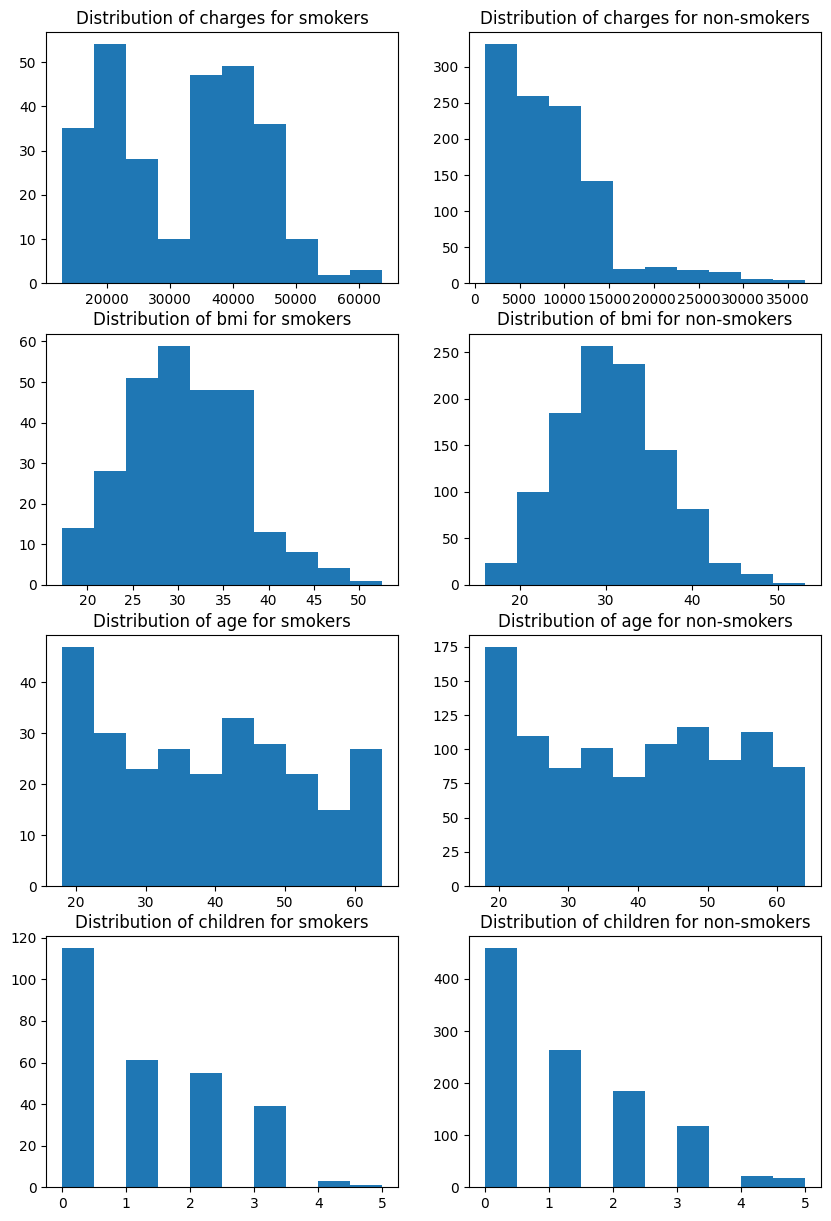

In [ ]:
numerical_features = ['charges', 'bmi', 'age', 'children']

subplot_number = 421
fig = plt.figure(figsize=(10,15))

for f in numerical_features:

  ax = fig.add_subplot(subplot_number)
  subplot_number += 1
  ax.hist(smokers[f])
  ax.set_title('Distribution of ' + f + ' for smokers')

  ax = fig.add_subplot(subplot_number)
  subplot_number += 1
  ax.hist(non_smokers[f])
  ax.set_title('Distribution of '+ f + ' for non-smokers')

From the above histograms,charges feature tells us the most about a person being smoker or not.

Now let's see if the gender influences being a smoker or no



smoker   no  yes
sex             
female  547  115
male    517  159


<Axes: xlabel='sex'>

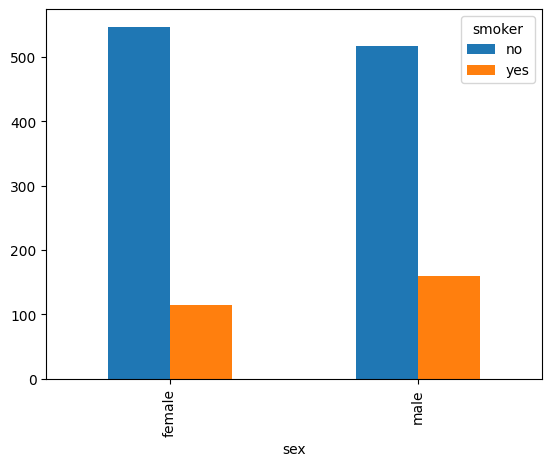

In [ ]:
Gender = pd.crosstab(data['sex'],data['smoker'])
print(Gender)
Gender.plot(kind='bar')



 the gender dosnt effect that much they are close to each athore

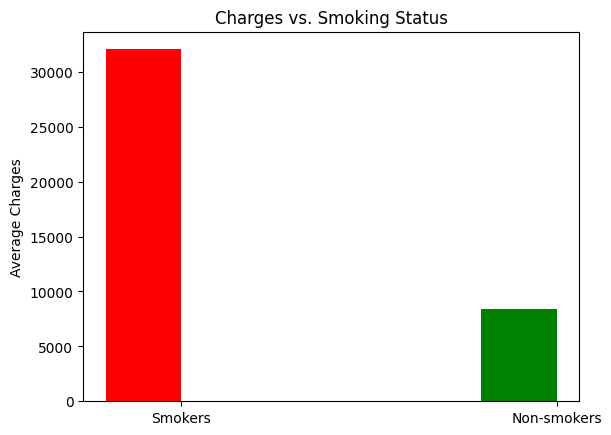

In [ ]:
fig, ax = plt.subplots()
width = 0.2

ax.bar(np.arange(2), [smokers['charges'].mean(), non_smokers['charges'].mean()], width, color=['red', 'green'])
ax.set_xticks(np.arange(2) + width / 2)
ax.set_xticklabels(['Smokers', 'Non-smokers'])
ax.set_ylabel('Average Charges')
ax.set_title('Charges vs. Smoking Status')
plt.show()

## 3.Data Preprocessing
"Garbage in, garbage out".

Data should be preprocessed and cleaned to get rid of noisy data.
Preprocessing includes:
 - dealing with missing data
   - remove whole rows (if they are not a lot)
   - infer (e.g., date of birth & age)
   - fill with mean, median, or even 0
 - removing unsued column(s)
 - convert categorical (non numerical) data into numerical
 - normalization: standarize data ranges for all features (e.g., between 0 and 1)



---



 Let's start by removing missing data.

###*Problem Statement:* Given above data build a machine learning model that can be to predict whether a person is smoker or not based on all the other features in the datasete.

**Question 6:** How many missing value are there in each column?

In [ ]:
# print how many missing value in each column
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### Convert Categorical columns to numerical

*   We need to convert the sex column from male/female to 0/1.
*   We need to convert the smoker column from no/yes to 0/1.






In [ ]:
# define dictionary

dictionary={'sex': {'male':0, 'female':1 }}

# replace sex column with 0/1

data['sex'] = data['sex'].replace(['male','female'],[0,1])



# print head to verify
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


And now the smokers column

In [ ]:
# define dictionary
smokers = {'no':0, 'yes':1}
# replace smokers column with 0/1
data['smoker'] = data['smoker'].apply(lambda x: smokers[x])
# print head to verify
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


And now the Region Column

In [ ]:
# define dictionary
regions = {'southwest':0, 'southeast':1, 'northwest':2, 'northeast':3}
# replace region column with the corresponding values
data['region'] = data['region'].apply(lambda x: regions[x])
# print head to verify
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


#### Normalization



In [ ]:
# get the max of each column

data.max()


age            64.00000
sex             1.00000
bmi            53.13000
children        5.00000
smoker          1.00000
region          3.00000
charges     63770.42801
dtype: float64

In [ ]:
# divide each column by its maximum value

data=data/data.max()


In [4]:
#scatter ,Box plot

##

##4.Data Visualization

In [45]:
# prompt: pd.read_csv(url)

data = pd.read_csv('/content/insurance.csv')

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<Axes: xlabel='charges', ylabel='Count'>

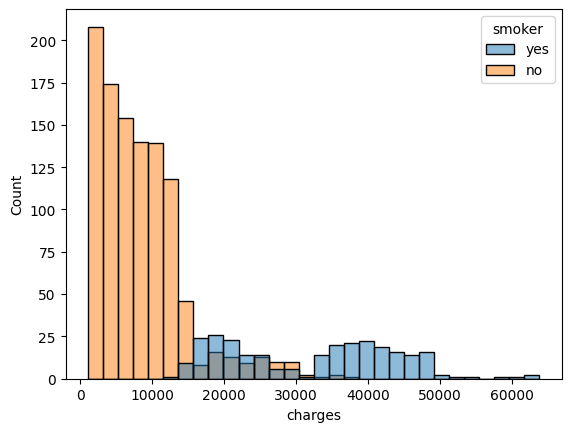

In [17]:
# @title Distribution of Charges by Smoking Status

sns.histplot(x = 'charges', hue = 'smoker', data = data)

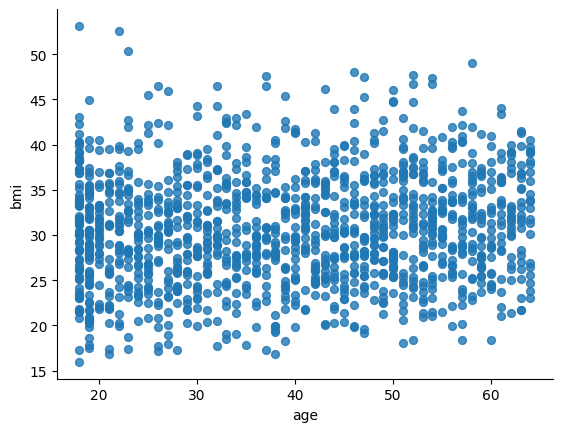

In [16]:
# @title age vs bmi

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='age', y='bmi', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

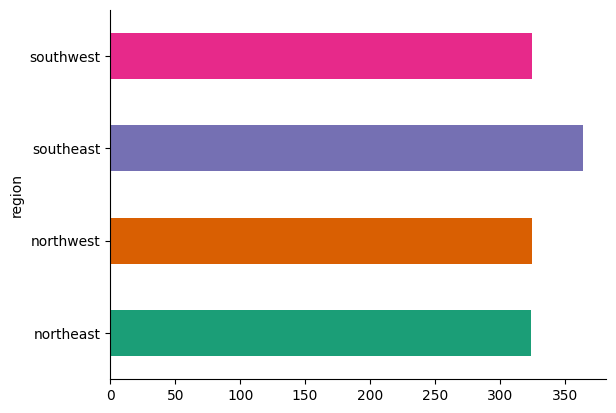

In [15]:
# @title region

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('region').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

###Boxplot

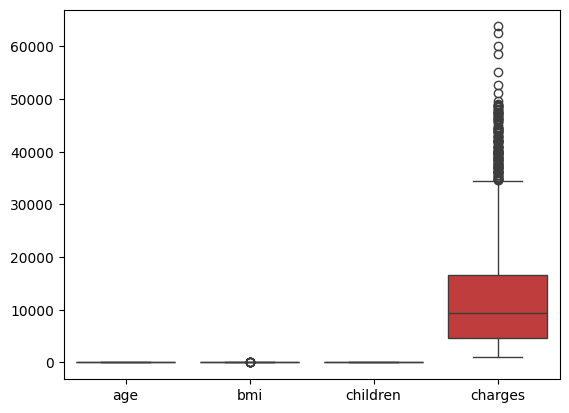

In [20]:
# prompt: Boxplot code

import seaborn as sns
sns.boxplot(data=data)
plt.show()


###Interactive plot using Plotly

In [73]:
# prompt: create Interactive plot using Plotly

import plotly.graph_objects as go

# Create data
age = [19, 18, 28, 32, 33]
smoker = [1, 0, 0, 0, 0]

# Create the figure
fig = go.Figure(data=go.Scatter(x=age, y=smoker))

# Update the layout
fig.update_layout(title='Interactive Plot using Plotly',
                  xaxis_title='age',
                  yaxis_title='smoker')

# Show the figure
fig.show()


###Histogram

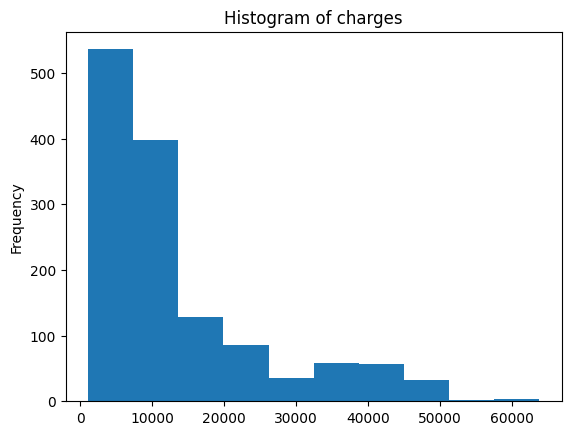

In [81]:
# prompt: Select the column to create a histogram

column_to_plot = 'charges'
#Create a histogram

data[column_to_plot].plot.hist(bins=10)
plt.title('Histogram of ' + column_to_plot)
plt.show()

## 5.Model Training & Testing



#### Data splits

 Before training, we need to split data into training (80%) & testing (20%)

In [ ]:
features = ['age',	'sex',	'bmi',	'children', 'region',	'charges']
X = data[features]

y = data['smoker']

# split dataset in a 80/20 split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1070, 6) (1070,)
(268, 6) (268,)


#### Logistic Regression Modeling


In [ ]:
# define our regression model
model = LogisticRegression()
# train our model
model.fit(x_train, y_train)

LogisticRegression()

#### Evaluation

In [ ]:
y_pred = model.predict(x_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_model_1 = accuracy_score(y_pred, y_test)
precision_model1 = precision_score(y_test, y_pred)
recall_model1 = recall_score(y_test, y_pred)
f1_score_model1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy_model_1,
      "\nPrecision:",precision_model1,
      "\nRecall:", recall_model1,
      "\nF1 Score:", f1_score_model1)

Accuracy: 0.917910447761194 
Precision: 0.9411764705882353 
Recall: 0.6153846153846154 
F1 Score: 0.744186046511628


We can see that the recall, and the f1 score can be improved.

**Question 9:** What can you do to improve results?

##5. Model Improvement

Now we will try to improve the model that we built.

####Handle data Imbalance

<Axes: >

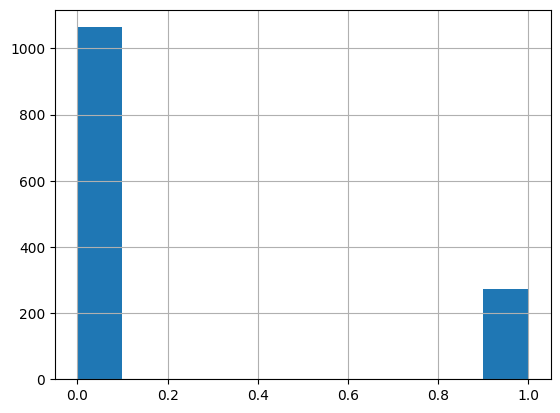

In [ ]:
data['smoker'].hist()

We can see that we have a clearly imbalanced dataset. To handle it, we choose to do 2 steps:
* Oversampling the minority class with a factor of 0.5
* Undersampling the majority class to obtain the same number in the 2 classes
<br>
We do that by using the RandomOverSaampler and RandomUnderSampler from the imblearn library.

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

over = RandomOverSampler(sampling_strategy= 0.5)
x_new, y_new = over.fit_resample(X, y)
under = RandomUnderSampler(sampling_strategy= 1)
x_new, y_new = under.fit_resample(x_new, y_new)

(array([532.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 532.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

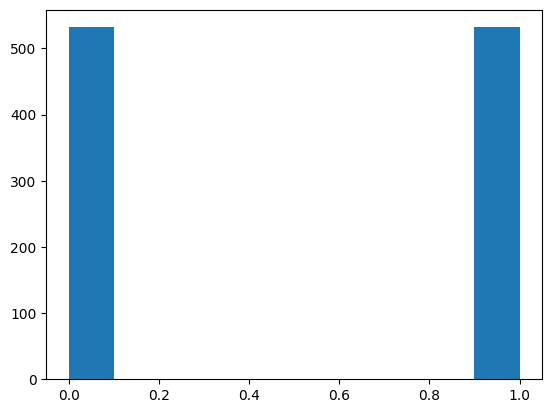

In [ ]:
plt.hist(y_new)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(x_test)

accuracy_model2 = accuracy_score(y_test, y_pred)
precision_model2 = precision_score(y_test, y_pred)
recall_model2 = recall_score(y_test, y_pred)
f1_score_model2 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy_model2,
      "\nPrecision:",precision_model2,
      "\nRecall:", recall_model2,
      "\nF1 Score:", f1_score_model2)

Accuracy: 0.92018779342723 
Precision: 0.8571428571428571 
Recall: 1.0 
F1 Score: 0.923076923076923


We can see how much our scores got better when we balanced our dataset.

#part2

##solve Q1

1. Loop:Question:Write a Python program that uses a 'for' loop to print all even numbers from 1 to 10. Then, use 'while' loop

In [ ]:
# create function even_num that take 2 parameter from user


# parameter#1 => first number parameter#2 => last number (Range of number)

##solve Q2

2. Control Flows:
Question:
Create a Python function named grade_classifier that takes a student's score as an argument and returns a string indicating their grade. Use the following criteria:

Score >= 90: "A"
80 <= Score < 90: "B"
70 <= Score < 80: "C"
60 <= Score < 70: "D"
Score < 60: "F"

In [ ]:
# Create function grade_classifier

def grade_classifier(Score):


#student_score = 80

##solve Q3

3. If Conditions:
Question:
Write a Python program that prompts the user to enter their age. Use if-elif-else statements to categorize and print the user's age group as follows:

If the age is less than 13, print "Child."
If the age is between 13 and 19 (inclusive), print "Teenager."
If the age is between 20 and 59 (inclusive), print "Adult."
If the age is 60 or older, print "Senior Citizen."

In [72]:
 # Create function
 age= int (input("Entre your age:"))
if age< 13:
  print ("Child.")
elif 13 <= age <= 19:
  print("Teenager.")
elif 20 <= age <= 59:
  print("Adult.")
else:
  print("Senior Citizen.")





# Prompt the user to enter their age

Entre your age:44
Adult.


##solve Q4

4. Functions:
Question:
Define a Python function named multiply_numbers that takes two parameters (num1 and num2) and returns their product. Test the function with values 5 and 7.
5 * 7 = 35

In [57]:
# Create function multiply_numbers(,)
def multiply_numbers(a, b):
    return a * b

result = multiply_numbers(5, 7)

print(result)
# Test the function with values 5 and 7

35


##solve Q5

5. Combine All the Above:
Question:
Write a Python program that does the following:

Prompts the user to enter a number (user_num).
Uses a loop to print all numbers from 1 to user_num (inclusive) that are divisible by 3.
Calls the grade_classifier function to classify a user's score (you can use a predefined score for testing).
Prints a message indicating whether the classified grade is satisfactory or not.

In [55]:
# Prompt the user to enter their age

# Use a loop to print numbers divisible by 3 from 1 to user_num
def result(N):

    for user_num in range(N):

            # Short-circuit operator is used
            if user_num % 3 == 0 :
                print(str(user_num) + " ")

            else:
                pass

if __name__ == "__main__":

    # input goes here
    N = 15

    # Calling function
    result(N)

0 
3 
6 
9 
12 
